# We are going to predect the price of Bitcoin using LSTM method

Lets import necessary libary

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

let's load our present data for prediction ( The data has been taken from the Web side 'WWW.twelvedata.com')

In [2]:
api_key='3aa545146899454d82aa265635a8a193'
symbel='UTC/USD'
interval = '5min'
order = 'asc'
start_date='2022-11-01 00:00:00'
end_date='2022-12-01 00:00:00'
api_url=f'https://api.twelvedata.com/time_series?symbol={symbel}&start_data={start_date}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'

In [3]:
data = requests.get(api_url).json()
data_final=pd.DataFrame(data['values'])
data_final

,datetime,open,high,low,close
0,2022-11-12 12:20:00,0.00674,0.00675,0.00674,0.00674
1,2022-11-12 12:25:00,0.00674,0.00674,0.00674,0.00674
2,2022-11-12 12:30:00,0.00674,0.00674,0.00673,0.00673
3,2022-11-12 12:35:00,0.00673,0.00674,0.00673,0.00674
4,2022-11-12 12:40:00,0.00674,0.00675,0.00674,0.00675
...,...,...,...,...,...
4995,2022-11-30 23:40:00,0.00687,0.00688,0.00687,0.00688
4996,2022-11-30 23:45:00,0.00688,0.00689,0.00688,0.00688
4997,2022-11-30 23:50:00,0.00688,0.00688,0.00687,0.00688
4998,2022-11-30 23:55:00,0.00687,0.00687,0.00687,0.00687


In [4]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data_final['close'].values.reshape(-1,1))

In [5]:
time_intervals_to_train=24
prediction_interval=12

x_train=[]
y_train=[]

In [6]:
for i in range(time_intervals_to_train, len(scaled_data) - prediction_interval):
  x_train.append(scaled_data[i - time_intervals_to_train:i, 0])
  y_train.append(scaled_data[i + prediction_interval, 0])

x_train = np.array(x_train)
y_train=np.array(y_train) 

In [7]:
x_train.shape

(4964, 24)

In [8]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [9]:
x_train.shape

(4964, 24, 1)

Let's apply LSTM for the model 

In [10]:
model = Sequential()


model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1),activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(64,return_sequences=True,activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
78/78 [==============================] - 11s 47ms/step - loss: 0.0207 - accuracy: 8.0580e-04
Epoch 2/10
78/78 [==============================] - 4s 46ms/step - loss: 0.0068 - accuracy: 0.0012
Epoch 3/10
78/78 [==============================] - 4s 47ms/step - loss: 0.0055 - accuracy: 0.0012
Epoch 4/10
78/78 [==============================] - 4s 54ms/step - loss: 0.0053 - accuracy: 0.0012
Epoch 5/10
78/78 [==============================] - 5s 62ms/step - loss: 0.0052 - accuracy: 0.0012
Epoch 6/10
78/78 [==============================] - 5s 64ms/step - loss: 0.0049 - accuracy: 0.0012
Epoch 7/10
78/78 [==============================] - 6s 74ms/step - loss: 0.0047 - accuracy: 0.0012
Epoch 8/10
78/78 [==============================] - 5s 70ms/step - loss: 0.0046 - accuracy: 0.0012
Epoch 9/10
78/78 [==============================] - 6s 72ms/step - loss: 0.0046 - accuracy: 0.0012
Epoch 10/10
78/78 [==============================] - 6s 76ms/step - loss: 0.0045 - accuracy: 0.0012


Lets test our model 

In [13]:
test_start='2022-12-02 00:00:00'
test_end='2022-12-05 00:00:00'

test_api_url=f'https://api.twelvedata.com/time_series?symbol={symbel}&start_data={test_start}&end_date={test_end}&interval={interval}&order={order}&apikey={api_key}'
test_data = requests.get(test_api_url).json()
test_data_final = pd.DataFrame(test_data['values'])
test_data_final


,datetime,open,high,low,close
0,2022-11-16 06:55:00,0.00675,0.00675,0.00675,0.00675
1,2022-11-16 07:00:00,0.00675,0.00676,0.00674,0.00676
2,2022-11-16 07:05:00,0.00675,0.00676,0.00675,0.00675
3,2022-11-16 07:10:00,0.00675,0.00675,0.00674,0.00674
4,2022-11-16 07:15:00,0.00674,0.00675,0.00674,0.00675
...,...,...,...,...,...
4995,2022-12-04 23:40:00,0.00684,0.00684,0.00684,0.00684
4996,2022-12-04 23:45:00,0.00684,0.00685,0.00684,0.00685
4997,2022-12-04 23:50:00,0.00685,0.00686,0.00685,0.00685
4998,2022-12-04 23:55:00,0.00685,0.00685,0.00684,0.00684


In [14]:
test_data_final['close']

0       0.00675
1       0.00676
2       0.00675
3       0.00674
4       0.00675
         ...   
4995    0.00684
4996    0.00685
4997    0.00685
4998    0.00684
4999    0.00683
Name: close, Length: 5000, dtype: object

In [15]:
pd.to_numeric (test_data_final['close'],errors='coerce')

0       0.00675
1       0.00676
2       0.00675
3       0.00674
4       0.00675
         ...   
4995    0.00684
4996    0.00685
4997    0.00685
4998    0.00684
4999    0.00683
Name: close, Length: 5000, dtype: float64

In [16]:
bitcoin_prices = pd.to_numeric (test_data_final['close'],errors='coerce').values

test_inputs =  test_data_final['close'].values
test_inputs = test_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(test_inputs)

In [17]:
x_test = []

for x in range(time_intervals_to_train,len(model_inputs)):
  x_test.append(model_inputs[x - time_intervals_to_train:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
x_test.shape

(4976, 24, 1)

In [19]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

156/156 [==============================] - 2s 12ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

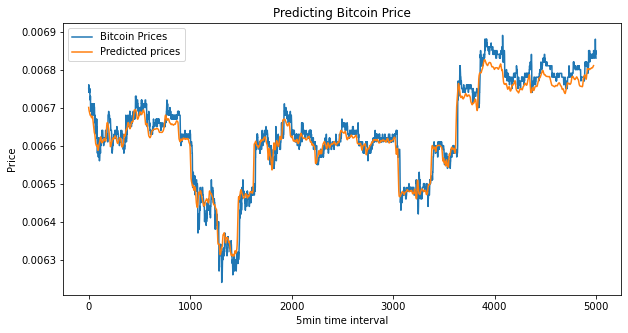

In [21]:
plt.figure(figsize=(10,5))
plt.plot(bitcoin_prices, label = 'Bitcoin Prices')
plt.plot(prediction_prices, label='Predicted prices')
plt.title('Predicting Bitcoin Price')
plt.xlabel('5min time interval')
plt.ylabel('Price')
plt.legend()
plt.show

In the observation of the above graph we come to know that the **predicted value  and actual value are almost closer**, So we conclude that the model has a good accuracy.

Lets predit what whould be price after 5 min

In [22]:
last_data = model_inputs[len(model_inputs)+1 - time_intervals_to_train : len(model_inputs)+1,0]
last_data = np.array(last_data)

In [23]:
last_data.shape

(23,)

In [24]:
last_data = np.reshape(last_data, (1, last_data.shape[0], 1))

In [25]:
prediction = model.predict(last_data)

1/1 [==============================] - 1s 526ms/step


In [26]:
prediction = scaler.inverse_transform(prediction)

In [27]:
prediction

array([[0.00680945]], dtype=float32)

We come to that price of the bitcoin price after 5 min